In [1]:
import pandas as pd
import numpy as np
import urllib
from PIL import Image
from bs4 import BeautifulSoup
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
movies_df = pd.read_csv("shuffled_movie_df.csv")
movies_df.head()

,Movie Name,Poster Image Link,Synopsis,Genre,IMDb_id,Plot Keywords,Storyline,Genre Variations
0,Big Fish,https://m.media-amazon.com/images/M/MV5BMTYyMz...,A frustrated son tries to determine the fa...,Adventure,tt0319061,fish father son relationship death of father f...,United Press International journalist Will...,Adventure Drama Fantasy
1,Scott Pilgrim vs. the World,https://m.media-amazon.com/images/M/MV5BMTkwNT...,Scott Pilgrim must defeat his new girlfrie...,Action,tt0446029,toronto canada sexy woman cleavage panties sca...,Scott Pilgrim plays in a band which aspire...,Action Comedy Fantasy
2,The Paleface,https://m.media-amazon.com/images/M/MV5BOGZhMG...,Calamity Jane is despatched to find out wh...,Western,tt0040679,comedy of errors misunderstanding punched in t...,Someone is selling guns to the Indians and...,Comedy Family Western
3,How the West Was Won,https://m.media-amazon.com/images/M/MV5BNTk2ND...,A family saga covering several decades of ...,Western,tt0056085,ulysses s. grant character abraham lincoln cha...,Setting off on a journey to the west in th...,Western
4,The Butterfly Effect,https://m.media-amazon.com/images/M/MV5BODNiZm...,Evan Treborn suffers blackouts during sign...,Sci-Fi,tt0289879,love butterfly effect child pornography time t...,Evan Treborn grows up in a small town with...,Drama Sci-Fi Thriller


# Introduction to the File:
This File contains the code that runs kmeans of each poster in order to get the top 16 colors in each poster. These rgb values are saved individually in the "total_df" dataset. After receiveing the top 16 colors, we then used these colors as features in order to build a machine learning model that predicts the genre based on these 16 colors. 

##### Generating top 16 colors for each individual poster
This runs K-Means clustering to get the top 16 colors for each individual poster and saves the results to a csv file named colors16.csv. If you are running this code for the first time and do not have colors16.csv, you will need to run this cell. Otherwise, if you have colors16.csv, you do not have to run this cell.

In [3]:
import time
from sklearn.cluster import KMeans
import imageio
import numpy as np
import operator
colors_df = pd.DataFrame()
def get_weights(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    weights = hist.astype("float")
    weights /= weights.sum()
    top_colors= clt.cluster_centers_
    weighted_colors = []
    for (weight, color) in zip(weights, top_colors):
        weighted_colors.append((color,weight))
    weighted_colors.sort(key=operator.itemgetter(1),reverse=True)
    return weighted_colors

for image_link in movies_df["Poster Image Link"]:
    rows = []
    urllib.request.urlretrieve(image_link,"poster.jpg")
    img = imageio.imread('poster.jpg') # 640x480x3 array
    pixel_arr = np.asarray(img)
    pixel_arr = pixel_arr.reshape((pixel_arr.shape[0] * pixel_arr.shape[1], 3))
    model = KMeans(n_clusters = 16)
    model.fit(pixel_arr)
    weights = get_weights(model)
    colors={}
    for i in range(0,16):
        color = weights[i][0]
        r_key = "r" + str(i+1)
        g_key = "g" + str(i+1)
        b_key = "b" + str(i+1)
        colors[r_key] = color[0]
        colors[g_key] = color[1]
        colors[b_key] = color[2]
    rows.append(colors)
    temp_df = pd.DataFrame(rows)
    colors_df = pd.concat([colors_df,temp_df],ignore_index=True)
colors_df

,b1,b10,b11,b12,b13,b14,b15,b16,b2,b3,...,r15,r16,r2,r3,r4,r5,r6,r7,r8,r9
0,2.186405,140.623134,161.620527,206.015370,20.471845,75.916067,25.072753,49.346032,193.453556,18.982926,...,147.312411,203.473016,114.297629,54.280884,32.575093,69.552550,225.003820,143.328564,248.379754,120.654167
1,8.935597,56.870667,98.173050,61.870640,99.403150,142.570600,140.396484,109.281513,4.152672,6.372499,...,227.166016,62.323529,108.262915,138.963077,248.903573,73.503786,211.126897,233.327970,21.310078,87.100522
2,233.586446,81.225225,41.071914,210.518820,16.177755,99.597046,136.179070,175.011070,246.669484,193.112947,...,103.917442,150.848708,247.694617,241.882059,15.745455,242.574756,18.771605,214.021722,178.768207,175.160851
3,248.682797,120.411017,57.161432,207.203284,86.646597,45.766329,170.929171,131.310669,98.443653,228.328819,...,149.476235,110.306485,240.800000,230.763013,245.757629,5.866348,20.383383,188.538232,157.093377,70.849123
4,5.357549,223.942876,89.305085,196.753577,211.126010,84.839609,128.983294,185.843342,250.214710,182.493566,...,130.868735,187.315927,242.114569,7.342371,6.874059,209.513185,7.487367,168.345455,12.167078,8.768734
5,32.053154,111.445811,74.961794,101.453382,244.443640,72.228415,46.234392,130.530405,16.821404,173.191383,...,102.202629,114.250000,12.755421,239.517368,53.285290,246.244970,203.469333,117.738758,243.150776,174.338157
6,98.995152,133.957367,92.671111,76.462420,61.629630,12.911079,163.475709,220.873171,84.163648,70.731921,...,236.594130,243.458537,155.929206,137.919946,99.796693,114.068734,189.876458,69.779015,225.381594,137.548507
7,1.603270,117.140212,92.978359,54.192864,49.248741,71.914494,74.032609,108.757098,10.362912,19.637727,...,92.028533,127.290221,20.673777,44.551604,241.853194,71.858764,231.501018,248.223594,216.658257,99.787037
8,15.722214,43.413352,138.823442,80.190141,86.325926,171.578732,35.953545,240.723214,4.804835,34.783485,...,213.733496,247.709821,8.583377,30.118336,45.717677,48.217391,71.946267,95.580895,88.341202,124.191024
9,4.801924,221.619137,236.126464,172.456338,244.416667,116.558824,55.839041,163.022222,172.038512,193.347186,...,138.791096,226.283333,2.789752,1.678936,21.138320,15.197649,47.964451,74.928502,22.159629,10.019097


In [4]:
index_list = []
for i in range(0,16):
    index_list.append("r"+str(i+1))
    index_list.append("g"+str(i+1))
    index_list.append("b"+str(i+1))
colors_df = colors_df.reindex(index_list, axis="columns")
colors_df.to_csv(path_or_buf="colors16.csv",index=False)
total_df = pd.concat([movies_df,colors_df],axis=1)
total_df.head()

,Movie Name,Poster Image Link,Synopsis,Genre,IMDb_id,Plot Keywords,Storyline,Genre Variations,r1,g1,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
0,Big Fish,https://m.media-amazon.com/images/M/MV5BMTYyMz...,A frustrated son tries to determine the fa...,Adventure,tt0319061,fish father son relationship death of father f...,United Press International journalist Will...,Adventure Drama Fantasy,8.154170,3.673441,...,20.471845,102.080336,88.665468,75.916067,147.312411,104.021398,25.072753,203.473016,149.701587,49.346032
1,Scott Pilgrim vs. the World,https://m.media-amazon.com/images/M/MV5BMTkwNT...,Scott Pilgrim must defeat his new girlfrie...,Action,tt0446029,toronto canada sexy woman cleavage panties sca...,Scott Pilgrim plays in a band which aspire...,Action Comedy Fantasy,169.637942,23.455238,...,99.403150,166.582205,169.928433,142.570600,227.166016,156.605469,140.396484,62.323529,86.943277,109.281513
2,The Paleface,https://m.media-amazon.com/images/M/MV5BOGZhMG...,Calamity Jane is despatched to find out wh...,Western,tt0040679,comedy of errors misunderstanding punched in t...,Someone is selling guns to the Indians and...,Comedy Family Western,234.200444,232.928180,...,16.177755,63.168776,92.140295,99.597046,103.917442,131.759302,136.179070,150.848708,168.630996,175.011070
3,How the West Was Won,https://m.media-amazon.com/images/M/MV5BNTk2ND...,A family saga covering several decades of ...,Western,tt0056085,ulysses s. grant character abraham lincoln cha...,Setting off on a journey to the west in th...,Western,244.406523,248.585376,...,86.646597,123.544618,94.872125,45.766329,149.476235,167.300093,170.929171,110.306485,126.596234,131.310669
4,The Butterfly Effect,https://m.media-amazon.com/images/M/MV5BODNiZm...,Evan Treborn suffers blackouts during sign...,Sci-Fi,tt0289879,love butterfly effect child pornography time t...,Evan Treborn grows up in a small town with...,Drama Sci-Fi Thriller,2.947774,3.640107,...,211.126010,73.290098,81.842399,84.839609,130.868735,121.873508,128.983294,187.315927,180.112272,185.843342


#### Reading in the CSV file that we generated above containing top 16 colors for each individual poster 

In [5]:
colors_df = pd.read_csv("colors16.csv")
total_df = pd.concat([movies_df,colors_df],axis=1)
total_df.to_csv("movies+colors16.csv",index=False)

In [6]:
total_df.head()

,Movie Name,Poster Image Link,Synopsis,Genre,IMDb_id,Plot Keywords,Storyline,Genre Variations,r1,g1,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
0,Big Fish,https://m.media-amazon.com/images/M/MV5BMTYyMz...,A frustrated son tries to determine the fa...,Adventure,tt0319061,fish father son relationship death of father f...,United Press International journalist Will...,Adventure Drama Fantasy,8.154170,3.673441,...,20.471845,102.080336,88.665468,75.916067,147.312411,104.021398,25.072753,203.473016,149.701587,49.346032
1,Scott Pilgrim vs. the World,https://m.media-amazon.com/images/M/MV5BMTkwNT...,Scott Pilgrim must defeat his new girlfrie...,Action,tt0446029,toronto canada sexy woman cleavage panties sca...,Scott Pilgrim plays in a band which aspire...,Action Comedy Fantasy,169.637942,23.455238,...,99.403150,166.582205,169.928433,142.570600,227.166016,156.605469,140.396484,62.323529,86.943277,109.281513
2,The Paleface,https://m.media-amazon.com/images/M/MV5BOGZhMG...,Calamity Jane is despatched to find out wh...,Western,tt0040679,comedy of errors misunderstanding punched in t...,Someone is selling guns to the Indians and...,Comedy Family Western,234.200444,232.928180,...,16.177755,63.168776,92.140295,99.597046,103.917442,131.759302,136.179070,150.848708,168.630996,175.011070
3,How the West Was Won,https://m.media-amazon.com/images/M/MV5BNTk2ND...,A family saga covering several decades of ...,Western,tt0056085,ulysses s. grant character abraham lincoln cha...,Setting off on a journey to the west in th...,Western,244.406523,248.585376,...,86.646597,123.544618,94.872125,45.766329,149.476235,167.300093,170.929171,110.306485,126.596234,131.310669
4,The Butterfly Effect,https://m.media-amazon.com/images/M/MV5BODNiZm...,Evan Treborn suffers blackouts during sign...,Sci-Fi,tt0289879,love butterfly effect child pornography time t...,Evan Treborn grows up in a small town with...,Drama Sci-Fi Thriller,2.947774,3.640107,...,211.126010,73.290098,81.842399,84.839609,130.868735,121.873508,128.983294,187.315927,180.112272,185.843342


In [3]:
total_df = pd.read_csv("movies+colors16.csv")
total_df.head()

,Movie Name,Poster Image Link,Synopsis,Genre,IMDb_id,Plot Keywords,Storyline,Genre Variations,r1,g1,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
0,Big Fish,https://m.media-amazon.com/images/M/MV5BMTYyMz...,A frustrated son tries to determine the fa...,Adventure,tt0319061,fish father son relationship death of father f...,United Press International journalist Will...,Adventure Drama Fantasy,8.154170,3.673441,...,20.471845,102.080336,88.665468,75.916067,147.312411,104.021398,25.072753,203.473016,149.701587,49.346032
1,Scott Pilgrim vs. the World,https://m.media-amazon.com/images/M/MV5BMTkwNT...,Scott Pilgrim must defeat his new girlfrie...,Action,tt0446029,toronto canada sexy woman cleavage panties sca...,Scott Pilgrim plays in a band which aspire...,Action Comedy Fantasy,169.637942,23.455238,...,99.403150,166.582205,169.928433,142.570600,227.166016,156.605469,140.396484,62.323529,86.943277,109.281513
2,The Paleface,https://m.media-amazon.com/images/M/MV5BOGZhMG...,Calamity Jane is despatched to find out wh...,Western,tt0040679,comedy of errors misunderstanding punched in t...,Someone is selling guns to the Indians and...,Comedy Family Western,234.200444,232.928180,...,16.177755,63.168776,92.140295,99.597046,103.917442,131.759302,136.179070,150.848708,168.630996,175.011070
3,How the West Was Won,https://m.media-amazon.com/images/M/MV5BNTk2ND...,A family saga covering several decades of ...,Western,tt0056085,ulysses s. grant character abraham lincoln cha...,Setting off on a journey to the west in th...,Western,244.406523,248.585376,...,86.646597,123.544618,94.872125,45.766329,149.476235,167.300093,170.929171,110.306485,126.596234,131.310669
4,The Butterfly Effect,https://m.media-amazon.com/images/M/MV5BODNiZm...,Evan Treborn suffers blackouts during sign...,Sci-Fi,tt0289879,love butterfly effect child pornography time t...,Evan Treborn grows up in a small town with...,Drama Sci-Fi Thriller,2.947774,3.640107,...,211.126010,73.290098,81.842399,84.839609,130.868735,121.873508,128.983294,187.315927,180.112272,185.843342


# Model 1- Euclidean Distance
This model uses the 16 rgb colors in the dataset above as its features and uses the regular built in Euclidean Distance metric to compare the colors. 

#### Finding which k value optimizes Accuracy
K = 2 optimizes Accuracy with an accuracy score of 36.4%

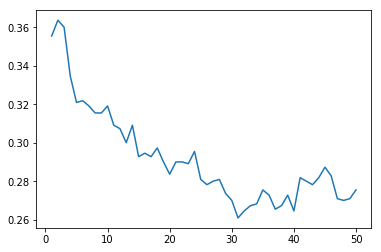

In [17]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict
index_list = []
for i in range(0,16):
    index_list.append("r"+str(i+1))
    index_list.append("g"+str(i+1))
    index_list.append("b"+str(i+1))
def getAccuracy(k):
    features=index_list
    X_train = total_df[features]
    y_train = total_df["Genre"]
    y_all_genres = total_df["Genre Variations"]
    model = KNeighborsClassifier(n_neighbors=k)
    scaler = StandardScaler()
    pipeline = Pipeline([("scaler", scaler), ("model", model)])

    predicted = cross_val_predict(model, X_train, y_train, cv=10)
    y_genres_list = list(y_all_genres)
    y_train_list = list(y_train)
    predicted_list = list(predicted)

    accuracy = 0
    accuracy1 = 0
    for i in range(0, len(predicted), 1):
        if predicted[i] in  y_genres_list[i]:
            accuracy += 1
    return accuracy/len(y_all_genres)
  
ks = pd.Series(range(1, 51,1))
ks.index = range(1, 51,1)
test_errs = ks.apply(getAccuracy)

test_errs.plot.line()

In [18]:
test_errs.sort_values()[-5:]

6    0.321818
4    0.334545
1    0.355455
3    0.360000
2    0.363636
dtype: float64

#### Finding which k value optimizes F1Score for each Genre
##### Note
We only checked the k value range from 1 to 20 on here becuase when we ran it originally from 1 to 51, the numbers were really low for k values after 20. 

Horror
0.221153846154
13    0.190000
10    0.200000
19    0.200957
12    0.204082
16    0.208955
11    0.208955
14    0.210000
15    0.212121
18    0.220096
17    0.221154
dtype: float64

Western
0.261306532663
9     0.226667
8     0.232258
10    0.242424
15    0.242424
19    0.244344
17    0.245283
18    0.245455
13    0.253968
16    0.260870
14    0.261307
dtype: float64

War
0.104046242775
12    0.033058
11    0.033333
13    0.033333
5     0.044118
2     0.047619
8     0.063492
9     0.065041
4     0.068966
7     0.074074
1     0.104046
dtype: float64

Sci-Fi
0.183266932271
5     0.101382
19    0.104803
4     0.106280
8     0.106667
2     0.113208
7     0.113537
18    0.114537
9     0.116071
6     0.130435
1     0.183267
dtype: float64

Action
0.322701688555
15    0.270510
6     0.273469
7     0.273913
9     0.281319
8     0.283843
10    0.295154
2     0.316008
5     0.316602
4     0.318681
3     0.322702
dtype: float64

Adventure
0.288607594937
19    0.227848
9     0.228155
12    0

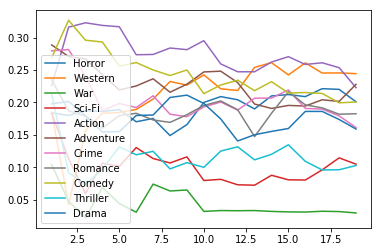

In [19]:
def getF1(k,genre):
    features=index_list
    X_train = total_df[features]
    y_train = total_df["Genre"]
    y_all_genres = total_df["Genre Variations"]
    model = KNeighborsClassifier(n_neighbors=k)
    scaler = StandardScaler()
    pipeline = Pipeline([("scaler", scaler), ("model", model)])
    predicted = cross_val_predict(pipeline, X_train, y_train, cv=10)

    y_genres_list = list(y_all_genres)
    y_train_list = list(y_train)
    predicted_list = list(predicted)

    cur_genre = genre
    precision_denominator = 0
    recall_denominator = 0
    true_positives = 0
    
    for i in range(0, len(predicted), 1):
        if predicted[i] == cur_genre and cur_genre in y_genres_list[i]:
               true_positives += 1
        if predicted[i] == cur_genre:
            precision_denominator += 1
        if cur_genre in y_genres_list[i]:
            recall_denominator += 1
    precision = true_positives / precision_denominator
    recall =  true_positives / recall_denominator
    
    return (2 * precision * recall / (precision + recall))
genres=["Horror","Western","War","Sci-Fi","Action","Adventure",
       "Crime","Romance","Comedy","Thriller","Drama"]
def getBestKVals():
    for genre in genres:
        ks = pd.Series(range(1, 20,1))
        ks.index = range(1, 20,1)
        test_errs = ks.apply(getF1,args=(genre,))
        print(genre)
        print(test_errs.max())
        print(test_errs.sort_values()[-10:])
        test_errs.plot.line(legend=True,label=genre)
        print()

getBestKVals()

### Conclusion on optimal k value to use with model using Poster Colors as Features
The best k value for accuracy was when k = 2 and looking at the f1 scores above it seems like 2 occurs in the top 10 also for all of the genres. Also when k=2 it yeilds f1 scores that are close to the highest f1score values. Because of this we have decided that the best k value for this model is when k = 2.<br>

Below are the f1 score values for each genre with k = 2 along with accuracy k = 2.

In [23]:
for genre in genres:
    print(genre)
    print(getF1(2,genre))
print("accuracy: " + str(getAccuracy(2)))

Horror
0.17989417989417988
Western
0.042105263157894736
War
0.04761904761904761
Sci-Fi
0.11320754716981131
Action
0.316008316008316
Adventure
0.2707423580786026
Crime
0.2814814814814815
Romance
0.18705035971223022
Comedy
0.32664756446991405
Thriller
0.09195402298850575
Drama
0.20157068062827227
accuracy: 0.36363636363636365


# Model 2- LAB Distance
This model uses the 16 rgb colors in the dataset above as its features and uses a distance metric function that we made called lab. We used an external library called color math in order to compare the distances between the colors. The reason why we used LAB was because the function was supposed to be more accurate than euclidean distance when comparing colors.  

#### Finding which k value optimizes Accuracy
We tried finding the best k value by using just 3 values based on what was optimal for euclidean, but even after using only 3 k values the model took over 3 hours+ and did not even generate 1 k value. This is because for each of the 1100 values in the dataset, we needed to loop over all of the 16 rgb values and do the calculations like that to compute lab distance. This results in over 17600 iterations - 1100*16 = 17600. Therefore we were not able to run this model.

In [38]:
from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000
from colormath.color_diff import delta_e_cie1976
def lab_distance(coded_color1,coded_color2):
    total_dist = 0
    i = 0
    
    total_dist = 0
    color1 = []
    color2 = []
    for d1,d2 in zip(coded_color1,coded_color2):
        color1.append(d1)
        color2.append(d2)
        if((i+1)%3 == 0):
            color1_lab = convert_color(sRGBColor(color1[0],color1[1],color1[2]),
                              LabColor)
            color2_lab = convert_color(sRGBColor(color2[0],color2[1],color2[2]),
                              LabColor)
            total_dist += delta_e_cie2000(color1_lab, color2_lab) 
            color1 = []
            color2 = []
        i+=1  
    avg_dist = total_dist/16
    return avg_dist

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_predict
def getAccuracy(k):
    features=index_list
    X_train = total_df[features]
    y_train = total_df["Genre"]
    y_all_genres = total_df["Genre Variations"]
    model = KNeighborsClassifier(n_neighbors=k,
                                 metric=lab_distance)
    pipeline = Pipeline([("model", model)])

    predicted = cross_val_predict(model, X_train, y_train, cv=10)
    y_genres_list = list(y_all_genres)
    y_train_list = list(y_train)
    predicted_list = list(predicted)

    accuracy = 0
    accuracy1 = 0
    for i in range(0, len(predicted), 1):
        if predicted[i] in  y_genres_list[i]:
            accuracy += 1
    return accuracy/len(y_all_genres)

print(getAccuracy(2))
print(getAccuracy(11))
print(getAccuracy(19))

In [ ]:
def getF1(k,genre):
    features=index_list
    X_train = total_df[features]
    y_train = total_df["Genre"]
    y_all_genres = total_df["Genre Variations"]
    model = KNeighborsClassifier(n_neighbors=k, metric = lab_distance)

    pipeline = Pipeline([("model", model)])
    predicted = cross_val_predict(pipeline, X_train, y_train, cv=10)

    y_genres_list = list(y_all_genres)
    y_train_list = list(y_train)
    predicted_list = list(predicted)

    cur_genre = genre
    precision_denominator = 0
    recall_denominator = 0
    true_positives = 0
    
    for i in range(0, len(predicted), 1):
        if predicted[i] == cur_genre and cur_genre in y_genres_list[i]:
               true_positives += 1
        if predicted[i] == cur_genre:
            precision_denominator += 1
        if cur_genre in y_genres_list[i]:
            recall_denominator += 1
    precision = true_positives / precision_denominator
    recall =  true_positives / recall_denominator
    
    return (2 * precision * recall / (precision + recall))
def getBestKVals():
    for genre in genres:
        ks = pd.Series(range(1, 25,1))
        ks.index = range(1, 25,1)
        print(genre)
        test_errs = ks.apply(getF1,args=(genre,))
        print(test_errs.max())
        print(test_errs.sort_values()[-10:])
        test_errs.plot.line(legend=True,label=genre)
        print()

getBestKVals()

# Conclusion
We created 2 models- one using Euclidean and one using Lab Distance. We decided to use the Euclidean Distance model mainly because the runtime for the Lab Distance Model was really slow. The reason for this is mentioned under Model 2's description. We still decided to include the code in this file because we wanted to further display our knowledge of KNearestNeighbors and that we know how to pass in our own distance metric, and also we thought the lab function would give us a better measure to see how closely related the colors are. 